In [1]:
from drivecycle import route, trajectory, utils, plots, graph, energy

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

In [2]:
with open('edges', 'rb') as handle:
    edges = pickle.load(handle)
    
with open('stops', 'rb') as handle:
    stops = pickle.load(handle)

In [3]:
edges


[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.698,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 204,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.007,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 7.607,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 131,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.067,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 23.67,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 177,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False},
    {'road_class': 'residential',
     'begin_heading': 0,
     'to_edge_name_consistency': False,
     'f

In [4]:
data_ = []
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [5]:
len(data_)

347

In [6]:
data_

[{'way_id': 463682703,
  'length': 7.0,
  'speed': 35,
  'intersection': ['service_other']},
 {'way_id': 463682703,
  'length': 67.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682703,
  'length': 156.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682702,
  'length': 44.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 130.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 144.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 16.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 13.0,
  'speed': 30,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 48.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199138512,
  'length': 50.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'length': 49.0,
  'speed': 40,
  'intersectio

In [7]:
a = graph.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()

In [8]:
stop={"bus_stop":30,"tertiary":10}
dc = route.sequential(a.get_edges(),stops=stop, stop_at_node=True, step=1)

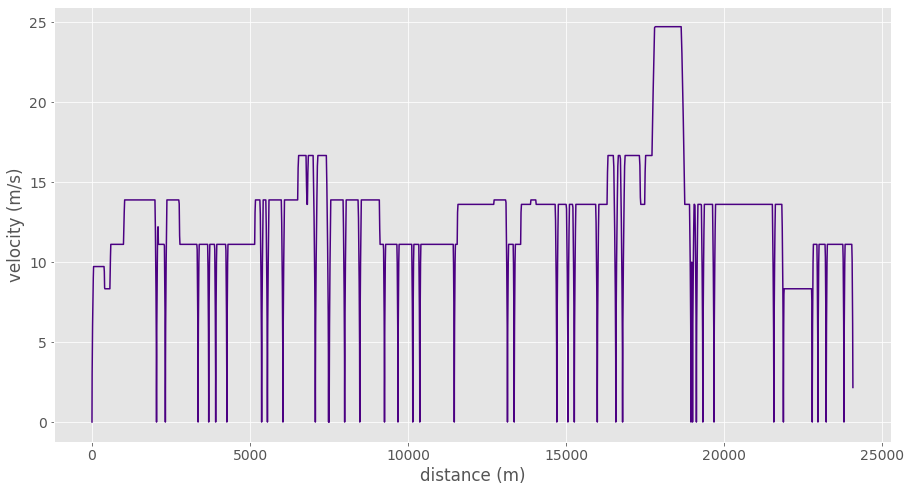

In [9]:
plots.plot_vd(dc,"route_drivecycle.png")

In [10]:
len(a.get_edges())

120

In [11]:
dc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       ...,
       [2.65200000e+03, 6.15911111e+00, 2.40588946e+04],
       [2.65300000e+03, 4.15911111e+00, 2.40640537e+04],
       [2.65400000e+03, 2.15911111e+00, 2.40672128e+04]])

In [12]:
power = energy.energy_model(dc,m=15000, area=8.5, capacity=555)
power

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  5.00000000e-01,
         1.93858567e+01,  9.99990297e-01],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         3.88557223e+01,  9.99970850e-01],
       ...,
       [ 2.65200000e+03,  6.15911111e+00,  2.40588946e+04,
        -1.09759883e+02,  9.48162275e-01],
       [ 2.65300000e+03,  4.15911111e+00,  2.40640537e+04,
        -7.45167158e+01,  9.48199570e-01],
       [ 2.65400000e+03,  2.15911111e+00,  2.40672128e+04,
        -3.88270389e+01,  9.48219003e-01]])

SoC: 0.9482190033037988


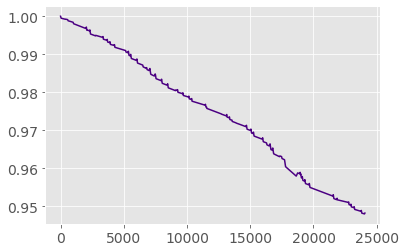

In [13]:
t=[i[2] for i in power]
p=[i[4] for i in power]

plt.plot(t,p, color='#4b0082', linewidth=1.5)

print(f"SoC: {power[-1,4]}")